In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold

In [3]:
syn_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Syn_resample_4000.csv')
syn_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
1,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
2,-0.060352,-0.344942,-0.086569,0.096351,-0.037724,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
3,-0.060352,-0.344942,-0.086569,0.096351,-0.037724,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
4,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,-0.060352,2.164873,0.629950,0.597352,0.085516,-0.003546,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,1.181746,1.541742,1.373369,-0.020880,2.396404,3.511758,2.911271,1.808577,-1
3999,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
4000,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
4001,-0.060352,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1


In [4]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [8]:
# novelty detection
df = pd.concat([benign_test_df, syn_df], ignore_index=True)

In [9]:
clean_dataset = df.drop([" Protocol", ' Label'], axis=1)

In [10]:
tres = 0.1

lowvariancefilter = VarianceThreshold(threshold=tres)
lowvariancefilter.fit_transform(clean_dataset)

filtered_cols = clean_dataset.drop(
    columns=clean_dataset.columns[lowvariancefilter.get_support()].array
).columns.array

lowvariance_dataset = clean_dataset.drop(columns=filtered_cols)
lowvariance_dataset

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,0.643201,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
1,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,0.931779,...,6.200510,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016
2,-0.344938,-0.176134,0.096351,-0.053129,-0.005474,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,-0.472948,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
3,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
4,-0.343689,-0.086569,0.096351,0.147135,0.002883,0.728125,2.040223,1.851116,-0.034669,0.655748,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,2.164873,0.629950,0.597352,0.085516,-0.003546,-0.046063,-0.039001,-0.049093,-0.034669,0.003313,...,1.741528,-0.059807,1.181746,1.541742,1.373369,-0.020880,2.396404,3.511758,2.911271,1.808577
8002,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
8003,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336
8004,-0.344948,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,-0.071968,...,-0.226895,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336


In [11]:
lowvariance_dataset["Label"] = df[" Label"].astype('category').cat.codes
lowvariance_dataset["Label"]

0       1
1       1
2       1
3       1
4       1
       ..
8001    0
8002    0
8003    0
8004    0
8005    0
Name: Label, Length: 8006, dtype: int8

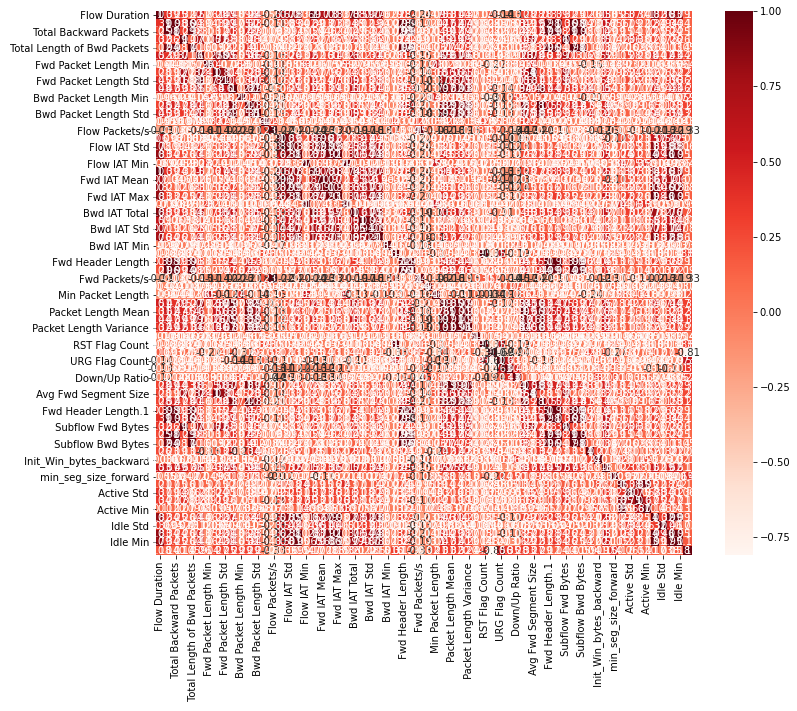

In [12]:
plt.figure(figsize=(12,10))
cor = lowvariance_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
cor_target = abs(cor["Label"])
cor_target

 Flow Duration                  0.176567
 Total Fwd Packets              0.137710
 Total Backward Packets         0.106345
Total Length of Fwd Packets     0.136917
 Total Length of Bwd Packets    0.059338
                                  ...   
Idle Mean                       0.165874
 Idle Std                       0.037846
 Idle Max                       0.145549
 Idle Min                       0.180685
Label                           1.000000
Name: Label, Length: 66, dtype: float64

In [27]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

 Fwd Packet Length Max     0.260832
 Fwd Packet Length Mean    0.269832
 Fwd Packet Length Std     0.254222
Bwd Packet Length Max      0.293590
 Bwd Packet Length Min     0.288659
 Bwd Packet Length Mean    0.293607
 Bwd Packet Length Std     0.274803
 Flow Packets/s            0.332033
Bwd IAT Total              0.213723
Fwd PSH Flags              0.309218
Fwd Packets/s              0.333736
 Min Packet Length         0.206573
 Max Packet Length         0.309387
 Packet Length Mean        0.318489
 Packet Length Std         0.318473
 Packet Length Variance    0.236709
 RST Flag Count            0.309218
 ACK Flag Count            0.808136
 URG Flag Count            0.558916
 CWE Flag Count            0.353403
 Down/Up Ratio             0.279632
 Average Packet Size       0.328274
 Avg Fwd Segment Size      0.269832
 Avg Bwd Segment Size      0.293607
 min_seg_size_forward      0.400732
Label                      1.000000
Name: Label, dtype: float64

In [28]:
len(relevant_features)

26